In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
lux_df = pd.read_csv("luxury.csv")
sus_df = pd.read_csv("sustainability.csv")

In [7]:
lux_sort = lux_df.sort_values(by="percentage of respondents", ascending=True)
Lux_set_df = lux_sort.set_index('Luxury Travel Priority')
Lux_set_df

,percentage of respondents
Luxury Travel Priority,
Plan with a travel agent,59
Privacy,79
Off-season travel for reduced crowds,80
High cleanliness standards,81
Personalized experiences,82


In [8]:
# set variables and plot title and subtitle
#changing lux_sort to Lux_set_df
index = Lux_set_df.index
values_lux = Lux_set_df['percentage of respondents']
lux_plot_title = 'Luxury Travel Priorities'
title_size = 18
lux_subtitle = 'source: American Express Travel Jan 2021 survey'
lux_x_label = 'percentage of respondents who agreed'

Text(0.5, 33.0, 'percentage of respondents who agreed')

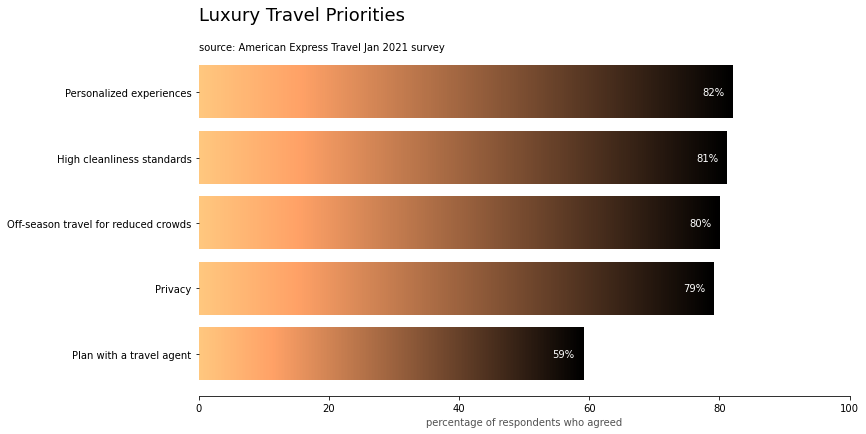

In [9]:
# sort values for plotting
Lux_set_df.sort_values(by='percentage of respondents', inplace=True, ascending=True)

# create figure 
fig, ax = plt.subplots(figsize=(12,6), facecolor=None)

#set colormap
mpl.pyplot.copper()

# remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


# create bars
bar = ax.barh(index, values_lux)
plt.tight_layout()
# Format ticks
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set(xlim=[0, 100])

# Set title
title = plt.title(lux_plot_title, pad=30, fontsize=title_size, horizontalalignment='left')
title.set_position([0, 1])

# Adjust subplots
plt.subplots_adjust(top=0.9, bottom=0.1)

# gradient for bars
def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)
gradientbars(bar)

# Set labels
rects = ax.patches
# For each bar: place a label
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = '{:,.0f}%'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'white')            # Change label color to white
    
# Set subtitle
trans = ax.get_xaxis_transform() # x in data untis, y in axes fraction
ann = ax.annotate(lux_subtitle, xy=(0,1), xycoords=trans)

#Set x-label
ax.set_xlabel(lux_x_label, color='#525252')    

In [10]:
sus_df

,Travelers Value,percentage
0,Boosting local economies,72
1,Choosing brands that value diversity and inclu...,69
2,Selecting airlines with a carbon neutral commi...,60
3,Supporting sustainability-friendly travel brands,68


In [11]:
sus_sort = sus_df.sort_values(by="percentage", ascending=False)
sustain_df = sus_sort.set_index('Travelers Value')
sustain_df

,percentage
Travelers Value,
Boosting local economies,72
Choosing brands that value diversity and inclusion,69
Supporting sustainability-friendly travel brands,68
Selecting airlines with a carbon neutral commitment,60


In [19]:
# set variables and plot title and subtitle
index_sus = sustain_df.index
values_sus = sus_sort['percentage']
sus_plot_title = "Travelers' Values"
title_size = 18
sus_subtitle = 'source: American Express Travel Jan 2021 survey'
sus_x_label = 'percentage of respondents who agreed'

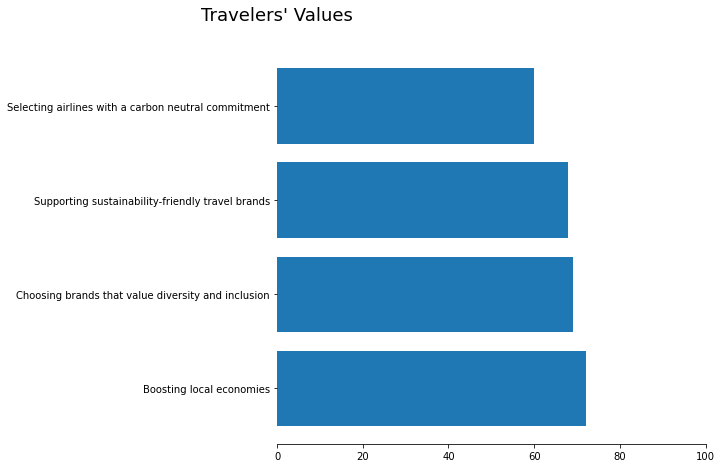

In [20]:
# sort values for plotting
sustain_df.sort_values(by='percentage', inplace=True, ascending=False)

# create figure 
fig, ax = plt.subplots(figsize=(10,6), facecolor=None)

# remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# create bars
bar_sus = ax.barh(index_sus, values_sus)
plt.tight_layout()
# Format ticks
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set(xlim=[0, 100])

# Set title
title = plt.title(sus_plot_title, pad=30, fontsize=title_size)
title.set_position([0, 1])